In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [56]:
data = pd.read_excel('Community_Diabetes_Risk_Analysis_500.xlsx')

# Exploration des données


In [57]:
df = data.copy()

In [58]:
df.head()

,Community_ID,Region,Population_Age_18_60,Avg_BMI,Daily_Sugar_Intake_g,Weekly_Physical_Activity_Hours,Family_History_Pct,Diabetes_Risk_Score,High_Risk_Zone
0,CMT001,Ibadan South,2445,25.5,84,1.0,14%,80.5,Yes
1,CMT002,North Lagos,4560,29.0,46,4.8,10%,57.9,No
2,CMT003,Ibadan South,3966,31.9,91,1.8,39%,111.0,Yes
3,CMT004,North Lagos,4519,30.9,77,4.6,33%,92.0,Yes
4,CMT005,Kampala North,2918,25.9,46,1.1,37%,84.1,Yes


In [59]:
df.shape

(500, 9)

## Nous avons 500 lignes et 9 colonnes

In [66]:
df.dtypes.value_counts()

,count
object,3
float64,3
int64,2


In [68]:
for col in df.select_dtypes(include=['object']):
    print(f'{col:-<10} {df[col].unique()}')


Region---- ['Ibadan South' 'North Lagos' 'Kampala North' 'Kigali South' 'Kumasi West'
 'Jos West' 'Nairobi Central' 'Accra East']
Family_History_Pct ['14%' '10%' '39%' '33%' '37%' '15%' '25%' '11%' '36%' '43%' '13%' '45%'
 '20%' '12%' '17%' '38%' '27%' '42%' '18%' '24%' '32%' '28%' '22%' '26%'
 '19%' '40%' '31%' '29%' '44%' '34%' '35%' '41%' '30%' '21%' '23%' '16%']
High_Risk_Zone ['Yes' 'No']


La colonne **Family_History_Pct** est classée colonne objet alors qu'en réalité c'est une colonne de type float. Il faudra donc la convertir.

In [ ]:
df['Family_History_Pct'] = (df['Family_History_Pct'].str.replace('%','',regex= False)
                                                    .astype(float) )

In [ ]:
df['Family_History_Pct']

In [60]:
df.isna().sum().sort_values(ascending=False)

,0
Community_ID,0
Region,0
Population_Age_18_60,0
Avg_BMI,0
Daily_Sugar_Intake_g,0
Weekly_Physical_Activity_Hours,0
Family_History_Pct,0
Diabetes_Risk_Score,0
High_Risk_Zone,0


In [61]:
df.drop('Community_ID', axis = 1, inplace = True)

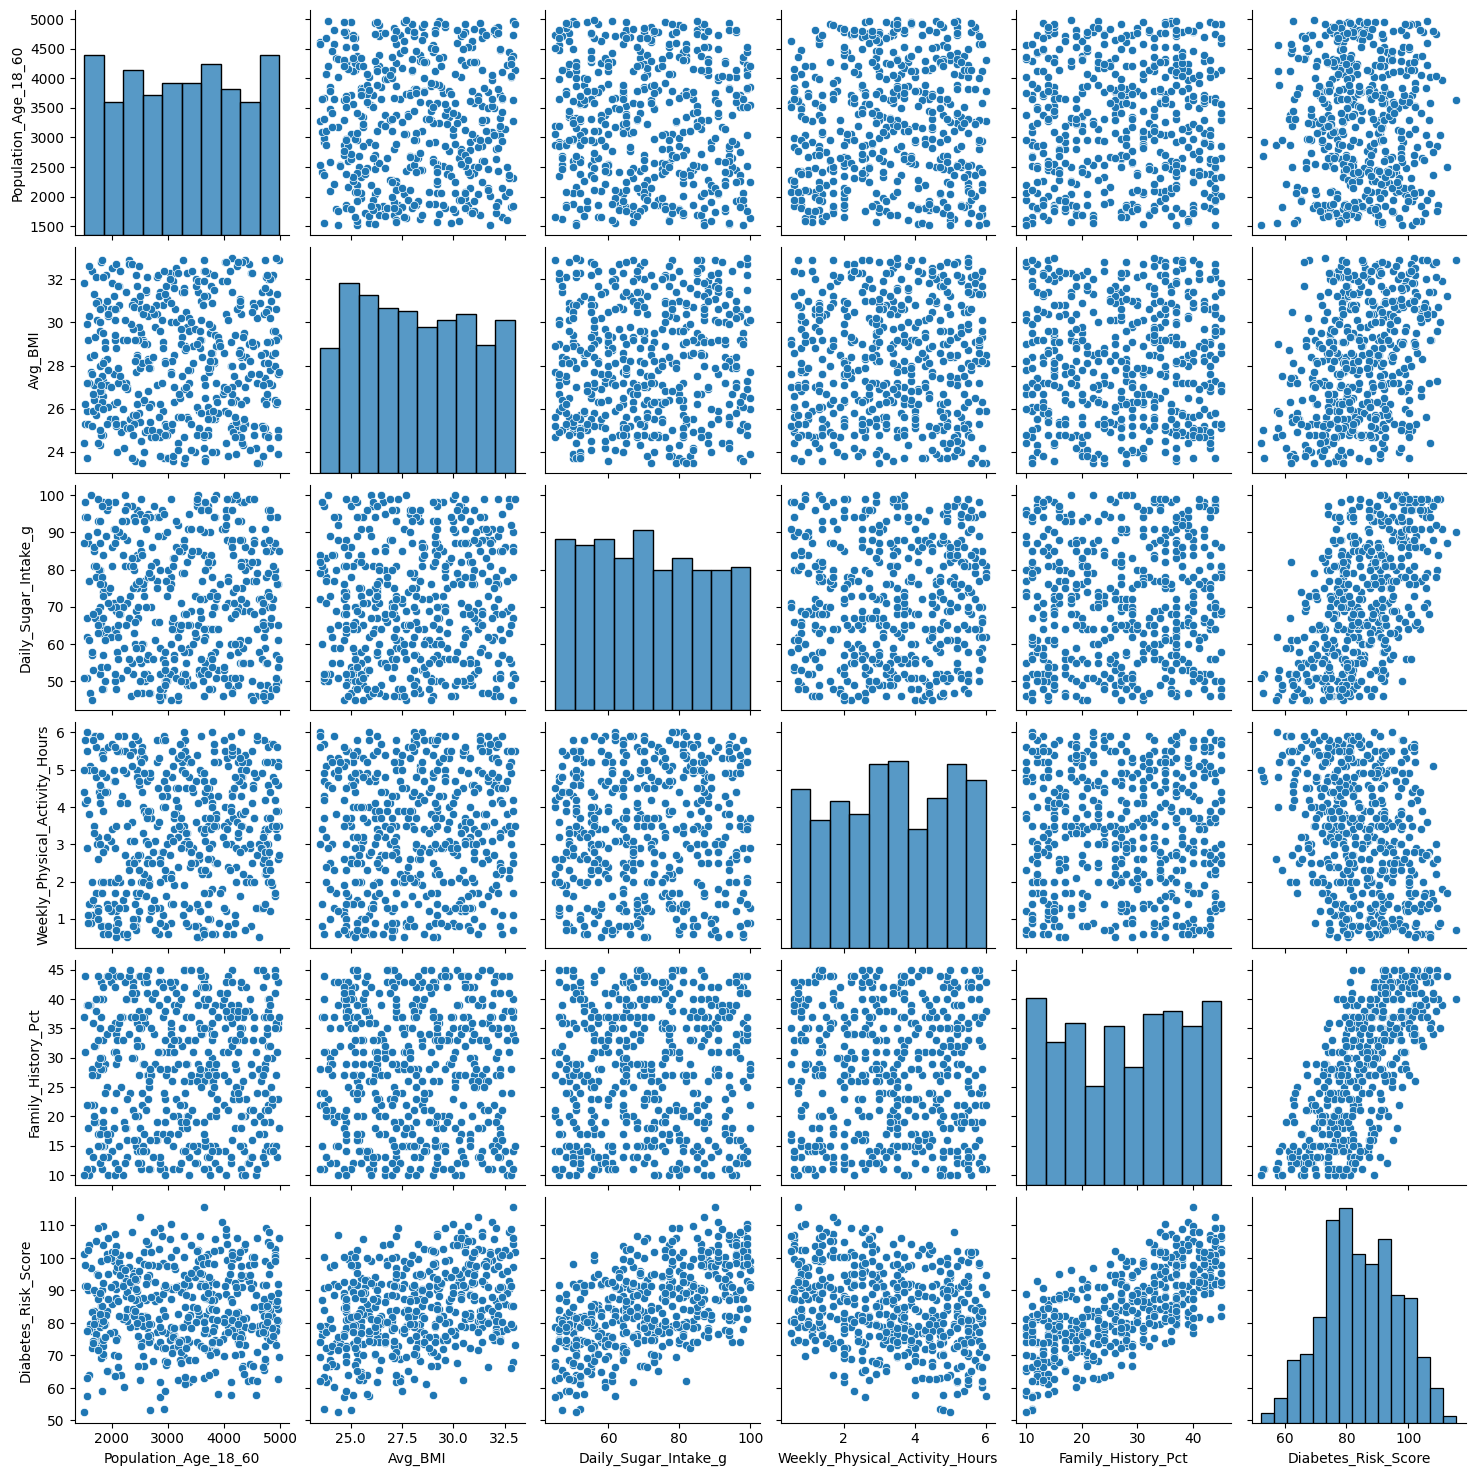

In [64]:
sns.pairplot(df)

In [80]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [81]:
df_encoded.head()

,Population_Age_18_60,Avg_BMI,Daily_Sugar_Intake_g,Weekly_Physical_Activity_Hours,Family_History_Pct,Diabetes_Risk_Score,Region_Ibadan South,Region_Jos West,Region_Kampala North,Region_Kigali South,Region_Kumasi West,Region_Nairobi Central,Region_North Lagos,High_Risk_Zone_Yes
0,2445,25.5,84,1.0,14.0,80.5,True,False,False,False,False,False,False,True
1,4560,29.0,46,4.8,10.0,57.9,False,False,False,False,False,False,True,False
2,3966,31.9,91,1.8,39.0,111.0,True,False,False,False,False,False,False,True
3,4519,30.9,77,4.6,33.0,92.0,False,False,False,False,False,False,True,True
4,2918,25.9,46,1.1,37.0,84.1,False,False,True,False,False,False,False,True


In [ ]:
df_encoded = df_encoded.astype(int)